<a href="https://colab.research.google.com/github/hug902/CHURN-ANALYST/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/data/churn_telecom.csv')

In [3]:
df.sample(5)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Extra International Charges,Customer Service Calls,...,Under 30,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
4748,1730-EDDE,Yes,66,327,"724,1",12,"36,9",Yes,"12,3",4,...,Yes,No,0,Yes,Two Year,Credit Card,41,2666,Dissatisfaction,Product dissatisfaction
3872,8258-IYWV,Yes,12,24,"47,2",0,0,No,0,4,...,No,No,0,No,Month-to-Month,Direct Debit,39,459,Competitor,Competitor made better offer
3325,3137-UHYB,No,5,22,"70,6",0,0,No,0,0,...,No,No,0,No,Month-to-Month,Credit Card,39,211,NaN,NaN
678,1490-ZOJU,No,38,85,264,0,0,No,0,0,...,No,No,0,No,One Year,Direct Debit,13,505,NaN,NaN
409,1959-TYXJ,No,69,195,"414,1",276,"641,7",Yes,"160,4",0,...,No,No,0,Yes,Two Year,Credit Card,33,2262,NaN,NaN


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Customer ID                        6687 non-null   object
 1   Churn Label                        6687 non-null   object
 2   Account Length (in months)         6687 non-null   int64 
 3   Local Calls                        6687 non-null   int64 
 4   Local Mins                         6687 non-null   object
 5   Intl Calls                         6687 non-null   object
 6   Intl Mins                          6687 non-null   object
 7   Intl Active                        6687 non-null   object
 8   Extra International Charges        6687 non-null   object
 9   Customer Service Calls             6687 non-null   int64 
 10  Avg Monthly GB Download            6687 non-null   int64 
 11  Unlimited Data Plan                6687 non-null   object
 12  Extra 

In [5]:

# Fill missing values in 'Churn Category' and 'Churn Reason' for churned customers
df.loc[df['Churn Label'] == 'Yes', 'Churn Category'] = df.loc[df['Churn Label'] == 'Yes', 'Churn Category'].fillna('Unknown')
df.loc[df['Churn Label'] == 'Yes', 'Churn Reason'] = df.loc[df['Churn Label'] == 'Yes', 'Churn Reason'].fillna('Unknown')


# Fill other missing values with "Not churn"
for column in ['Churn Category', 'Churn Reason']:
    df[column] = df[column].fillna('Not Churn')

# verify the changes
print(df.isnull().sum())


Customer ID                          0
Churn Label                          0
Account Length (in months)           0
Local Calls                          0
Local Mins                           0
Intl Calls                           0
Intl Mins                            0
Intl Active                          0
Extra International Charges          0
Customer Service Calls               0
Avg Monthly GB Download              0
Unlimited Data Plan                  0
Extra Data Charges                   0
State                                0
Phone Number                         0
Gender                               0
Age                                  0
Under 30                             0
Group                                0
Number of Customers in Group         0
Device Protection & Online Backup    0
Contract Type                        0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Churn Category           

In [6]:
df.sample(10)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Extra International Charges,Customer Service Calls,...,Under 30,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
2978,0412-SCMW,No,57,205,"801,8",228,"535,8",Yes,"178,6",1,...,No,No,0,No,Month-to-Month,Direct Debit,44,2520,Not Churn,Not Churn
1409,4377-WZGR,No,30,82,"237,8",90,468,Yes,156,0,...,No,No,0,Yes,Two Year,Paper Check,23,671,Not Churn,Not Churn
4069,7462-DSGJ,Yes,17,45,"120,7",0,0,No,0,0,...,No,No,0,No,Month-to-Month,Direct Debit,42,718,Competitor,Competitor had better devices
616,2176-OQUJ,No,21,38,"83,5",0,0,No,0,1,...,No,No,0,No,Month-to-Month,Credit Card,13,276,Not Churn,Not Churn
14,1260-HOAY,No,28,36,"110,7",0,0,No,0,0,...,Yes,No,0,No,Month-to-Month,Direct Debit,22,602,Not Churn,Not Churn
3412,0508-ETXY,No,44,173,"531,3",176,"624,8",Yes,0,0,...,No,No,0,No,Month-to-Month,Direct Debit,22,974,Not Churn,Not Churn
1913,0944-HQWD,No,70,283,"906,6",0,0,No,0,0,...,No,No,0,Yes,One Year,Direct Debit,47,3306,Not Churn,Not Churn
6658,8205-IEGL,Yes,30,211,427,120,465,Yes,"232,5",4,...,No,Yes,5,No,Month-to-Month,Credit Card,18,554,Dissatisfaction,Network reliability
2490,2349-BXQP,No,70,414,"770,5",0,0,No,0,0,...,Yes,No,0,Yes,Two Year,Direct Debit,59,4163,Not Churn,Not Churn
4539,4778-OWRZ,Yes,1,2,5,4,"9,5",Yes,"4,8",0,...,No,No,0,No,Month-to-Month,Direct Debit,45,45,Competitor,Competitor offered more data


In [7]:

# bins và labels
bins = [0, 20, 35, 50, float('inf')]
labels = ['<20', '20-35', '35-50', '>50']

# new 'Age Group'
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [8]:
df[['Age', 'Age Group']].sample(5)

,Age,Age Group
6673,62,>50
5694,27,20-35
4043,40,35-50
6508,56,>50
114,59,>50


In [9]:
# group account length
# bins và labels cho Account Length
bins = [0, 6, 12, 24, float('inf')]
labels = ['<6 tháng', '6-12 tháng', '12-24 tháng', '>24 tháng']

# New 'Account Length Group'
df['Months Use'] = pd.cut(df['Account Length (in months)'], bins=bins, labels=labels, right=False)
df[['Account Length (in months)', 'Months Use']].sample(5)

,Account Length (in months),Months Use
2923,54,>24 tháng
4355,69,>24 tháng
5244,39,>24 tháng
701,61,>24 tháng
2490,70,>24 tháng


In [10]:
# Convert 'Churn Label' to numerical values
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})
# count churn label == 1 customer
Churned_customer = len(df[df['Churn Label']==1])
# total customer
Total_customer = len(df)
# Count active customer
active_customer = len(df[df['Churn Label']==0])
# Churn_rate
churn_rate = Churned_customer / Total_customer * 100

print(f'Khách hàng đã churn: {Churned_customer}')
print(f'Tổng số khách hàng: {Total_customer}')
print(f'Số khách hàng còn hoạt động: {active_customer}')
print(f'Tỷ lệ phần trăm churn: {churn_rate}')

Khách hàng đã churn: 1796
Tổng số khách hàng: 6687
Số khách hàng còn hoạt động: 4891
Tỷ lệ phần trăm churn: 26.85808284731569


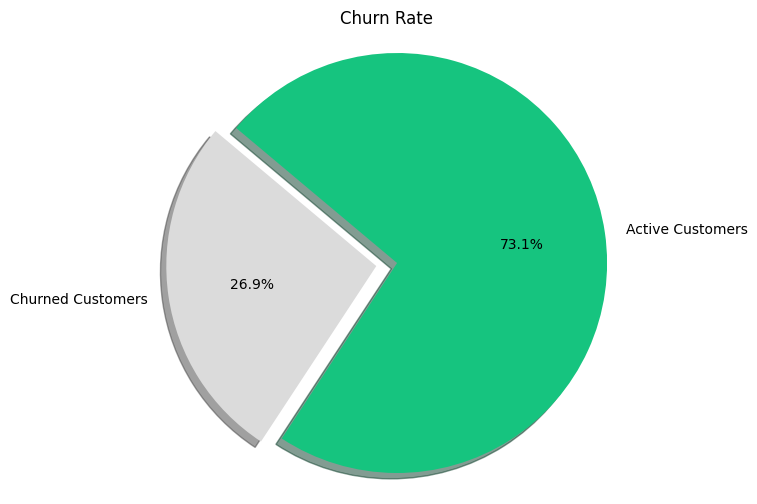

In [11]:

# pie chart churn rate
labels = ['Churned Customers', 'Active Customers']
sizes = [Churned_customer, active_customer]
colors = ['#DBDBDB', '#16C47F']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Rate')
plt.show()


- State california có tỷ lệ khách hàng rời đi nhiều nhất với tỷ lệ 60%
- State Ohio có tỷ lệ khách hàng rời đi là 35%

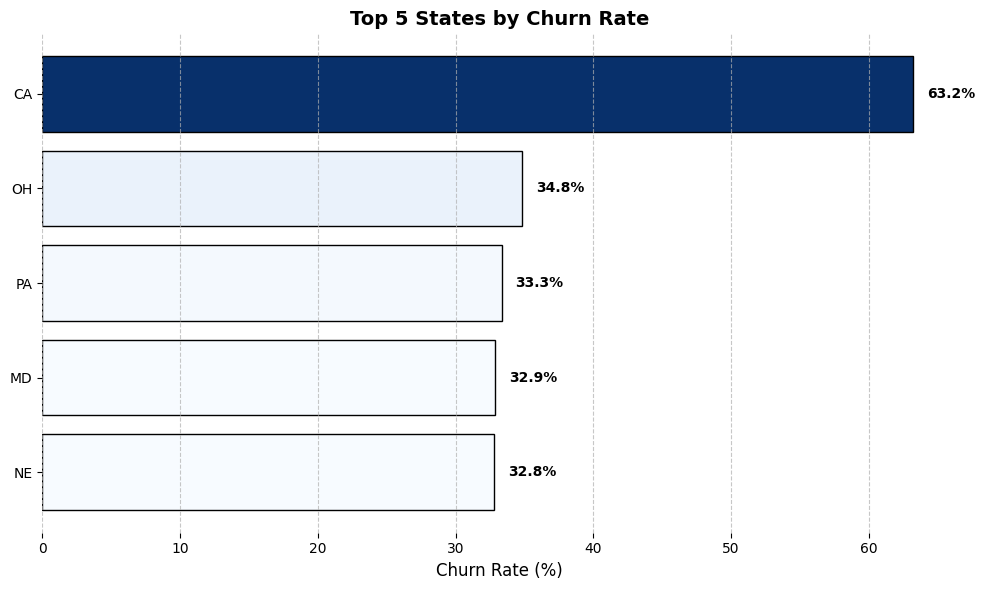

In [12]:
# churn rate caculated
churn_by_state = df.groupby('State')['Churn Label'].mean().reset_index()

# Top 5 state by churn rate
top5_churn = churn_by_state.sort_values(by='Churn Label', ascending=False).head(5)

# create chart
plt.figure(figsize=(10,6))
norm = plt.Normalize(top5_churn['Churn Label'].min(), top5_churn['Churn Label'].max())
colors = plt.cm.Blues(norm(top5_churn['Churn Label']))

bars = plt.barh(top5_churn['State'], top5_churn['Churn Label']*100, color=colors,edgecolor='black')

# add %
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Style
plt.gca().invert_yaxis()
plt.xlabel('Churn Rate (%)', fontsize=12)
plt.title('Top 5 States by Churn Rate', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<ipython-input-13-a94fc9617711>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-13-a94fc9617711>:13: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


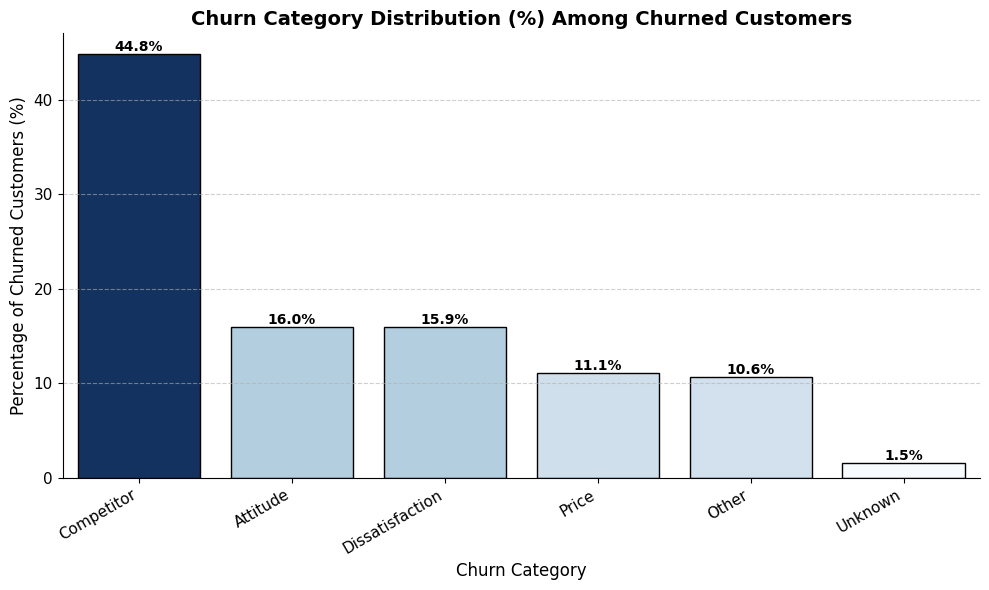

In [13]:
# filter churn customer
churned_df = df[df['Churn Label'] == 1]

# % churn rate by category
churn_category_percent = churned_df['Churn Category'].value_counts(normalize=True) * 100

# Normalize values for coloring
norm = plt.Normalize(churn_category_percent.min(), churn_category_percent.max())
colors = plt.cm.Blues(norm(churn_category_percent.values))

# Create figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=churn_category_percent.index,
    y=churn_category_percent.values,
    palette=colors,
    edgecolor='black'
)

# Add percentage labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize
plt.xlabel('Churn Category', fontsize=12)
plt.ylabel('Percentage of Churned Customers (%)', fontsize=12)
plt.title('Churn Category Distribution (%) Among Churned Customers', fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show
plt.show()


- Phân loại lý do quyết định tơi việc rời đi của khách hàng là chủ yêu do đối thủ cạnh tranh
- Các yếu tố còn lại ảnh hưởng do thái độ(của dịch vụ cskh) , sự không hài lòng ở chất lượng dịch vụ và giá cả mà khách hàng phải bỏ ra.

<ipython-input-14-06779a9cc91b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-14-06779a9cc91b>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


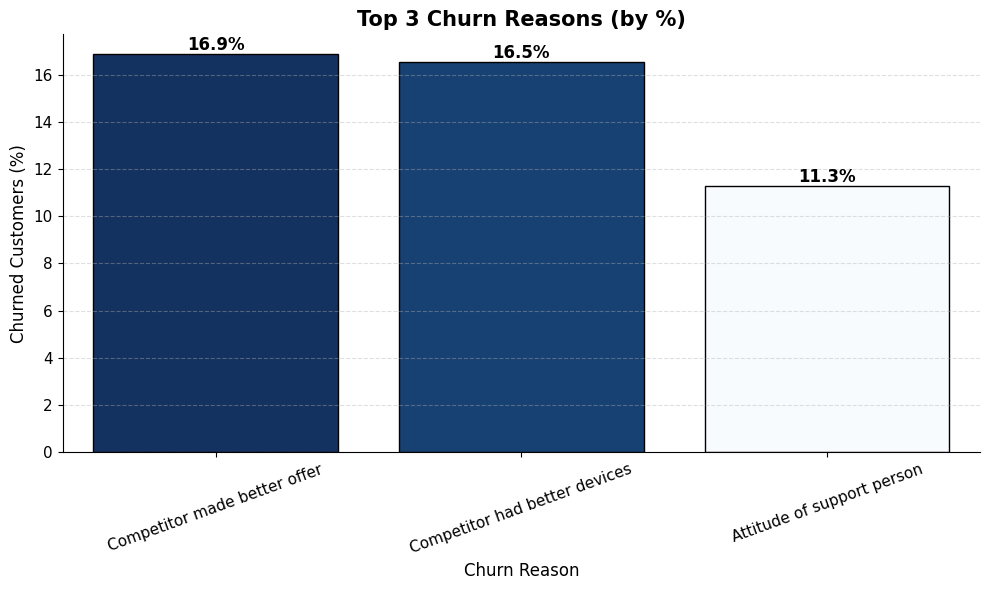

In [14]:
# top 3 churn reason %
churn_reasons_percent = churned_df['Churn Reason'].value_counts(normalize=True).head(3) * 100

# Normalize color
norm = plt.Normalize(churn_reasons_percent.min(), churn_reasons_percent.max())
colors = plt.cm.Blues(norm(churn_reasons_percent.values))

# create chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=churn_reasons_percent.index,
    y=churn_reasons_percent.values,
    palette=colors,
    edgecolor='black'
)

# add %
for p in ax.patches:
    percent = p.get_height()
    ax.annotate(f'{percent:.1f}%',  # làm tròn 1 chữ số thập phân
                (p.get_x() + p.get_width() / 2., percent),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# edit chart
plt.xlabel('Churn Reason', fontsize=12)
plt.ylabel('Churned Customers (%)', fontsize=12)
plt.title('Top 3 Churn Reasons (by %)', fontsize=15, fontweight='bold')
plt.xticks(rotation=20, ha='center', fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# show chart
plt.show()


- Lý do chiếm phần lớn tới sự ra đi của khách hàng là do đối thủ cạnh tranh với công ty có chiến lược và những offer thu hút khách hàng hơn công ty.
- Lý do thứ 2 là do sự chênh lệch về phần mềm hệ thống, đối thủ có những hệ thống tân tiến hơn so với công ty.
- Lý do thứ 3 khiến khách hàng quyết định rời đi là yếu tố thái độ phục vụ và hỗ trợ của đội ngũ chăm sóc khach hàng khi khách hàng gặp vấn đề.
- Một số lý do ngoài lệ có thể nằm ở việc nhà mạng đối thủ có nhiều gói ưu đãi về dung lượng hơn.

<ipython-input-15-a888859e07b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('Age Group')['Churn Label'].mean() * 100
<ipython-input-15-a888859e07b5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-15-a888859e07b5>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


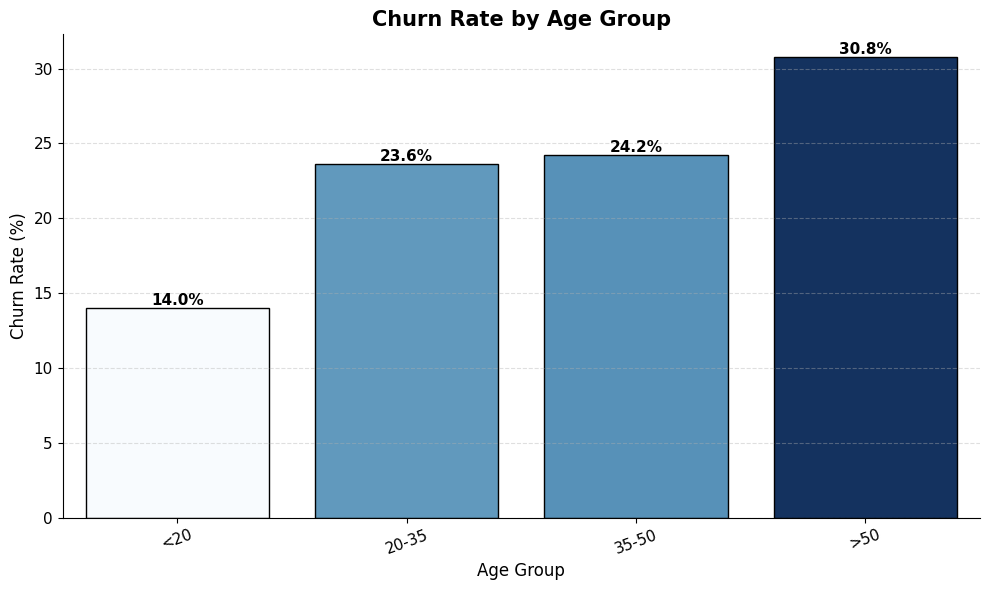

In [15]:

# Calculate churn rate by age group
churn_by_age = df.groupby('Age Group')['Churn Label'].mean() * 100

# Normalize để tạo màu sắc đậm nhạt
norm = plt.Normalize(churn_by_age.min(), churn_by_age.max())
colors = plt.cm.Blues(norm(churn_by_age.values))  # Chọn màu xanh dương

# create chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=churn_by_age.index,
    y=churn_by_age.values,
    palette=colors,
    edgecolor='black'
)

# add label for each column
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# decor chart
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Churn Rate by Age Group', fontsize=15, fontweight='bold')
plt.xticks(rotation=20, ha='center', fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Show plot
plt.show()


- Nhóm độ tuổi có tỷ lệ churn cao nhất là nhóm trung niên cao tuổi từ 50 trở lên do nhóm này có sự nhảy cảm về giá dịch vụ cũng những là người cao tuổi họ sẽ sử dụng ít dịch vụ hơn so với những gì mà gói dịch vụ của nhà cung cấp
- Nhóm độ tổi trung niên trở xuống là nhóm độ tuổi làm người lao động và sử dụng rất nhiều dịch vụ viễn thông.

<ipython-input-16-d21decb38694>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_months = df.groupby('Months Use')['Churn Label'].mean() * 100
<ipython-input-16-d21decb38694>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-16-d21decb38694>:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


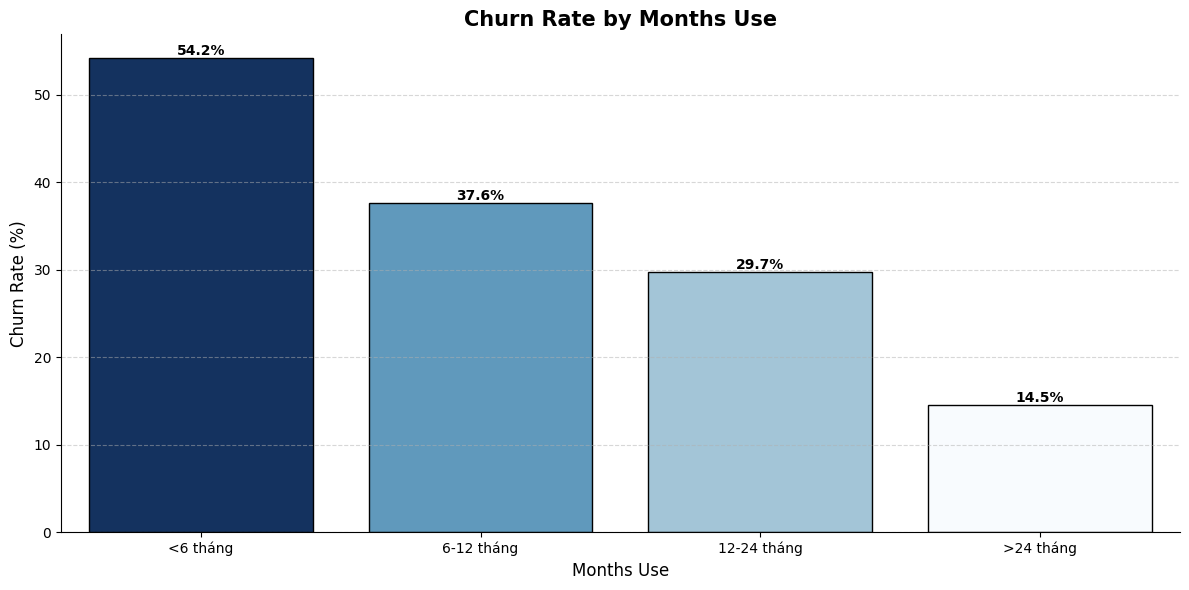

In [16]:
# caculte churn rate by Months Use
churn_by_months = df.groupby('Months Use')['Churn Label'].mean() * 100
# Normalize color
norm = plt.Normalize(churn_by_months.min(), churn_by_months.max())
colors = plt.cm.Blues(norm(churn_by_months.values))  # màu xanh dương

# create chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=churn_by_months.index,
    y=churn_by_months.values,
    palette=colors,
    edgecolor='black'
)

# add %
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# decor chart
plt.xlabel('Months Use', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Churn Rate by Months Use', fontsize=15, fontweight='bold')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show
plt.show()

- Tỷ lệ churn của khách hàng sẽ chủ yếu nằm ở những khách hàng có thời gian sử dụng dịch vụ ít hơn 6 tháng
- Những nhóm khách hàng sử dụng từ một năm trở lên là nhóm khách hàng trung thành và chiếm đem lại doanh thu do nhóm này sử dụng dịch vụ lâu sẽ có xu huongs đăng kí hợp đồng theo năm


<ipython-input-17-907eccb113e4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-17-907eccb113e4>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


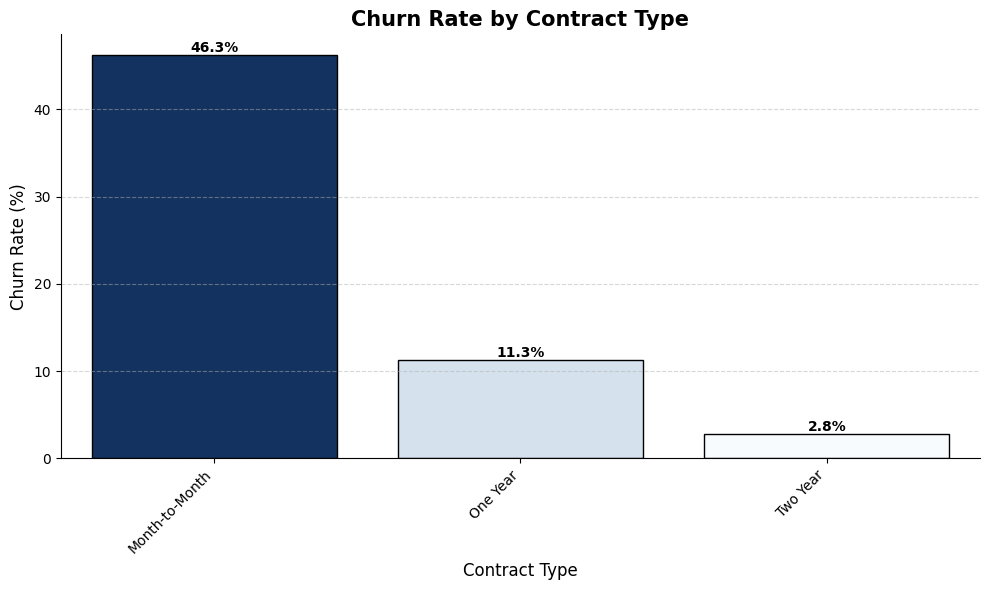

In [17]:

# Calculate churn rate by contract type
churn_by_contract = df.groupby('Contract Type')['Churn Label'].mean() * 100

# Normalize để tạo độ đậm nhạt màu
norm = plt.Normalize(churn_by_contract.min(), churn_by_contract.max())
colors = plt.cm.Blues(norm(churn_by_contract.values))  # dùng gam màu xanh dương

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=churn_by_contract.index,
    y=churn_by_contract.values,
    palette=colors,
    edgecolor='black'
)

# Thêm nhãn % trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Trang trí biểu đồ
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Churn Rate by Contract Type', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show
plt.show()


- Tỷ lệ churn của nhóm hợp đồng month to month cao hơn so với các nhóm hợp đồng khác nguyên nhân liên hệ trực tiếp với biểu đồ phân bố hợp đồng, những nhóm khách hàng rời đi thường tập trung ở nhóm dùng dưới 6 tháng
- nhóm hợp đồng còn lại có tỷ lệ churn ít hơn do đây là tập trung của những khách hàng trung thành và khách hàng sử dụng lâu đời.

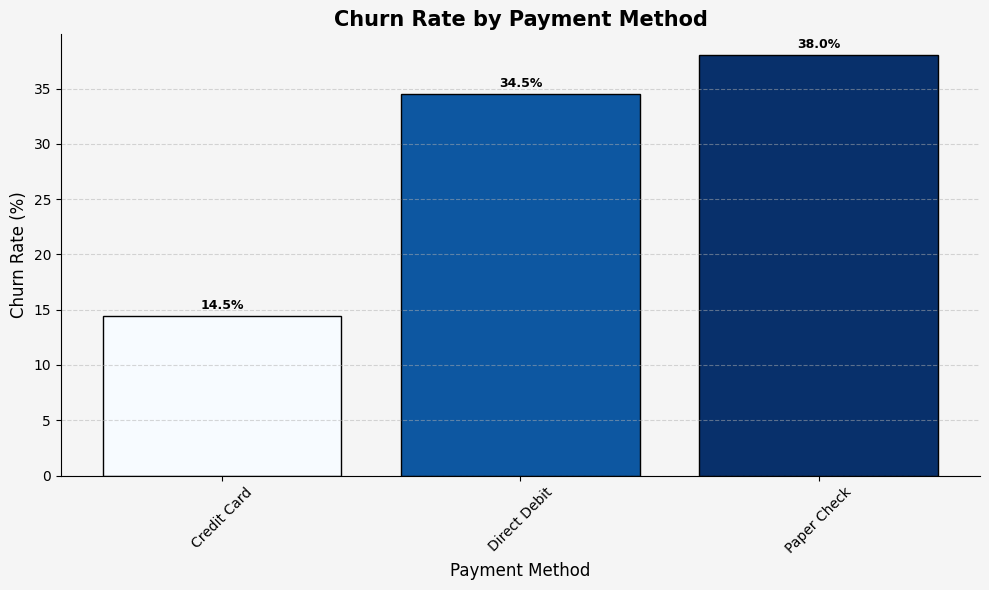

In [18]:

# Group by 'Payment Method' and calculate the churn rate
churn_by_payment = df.groupby('Payment Method')['Churn Label'].mean() * 100

# Normalize để làm đậm nhạt màu sắc
norm = plt.Normalize(churn_by_payment.min(), churn_by_payment.max())
colors = plt.cm.Blues(norm(churn_by_payment.values))  # Gam màu xanh đơn sắc

# Tạo figure và ax
fig, ax = plt.subplots(figsize=(10, 6))

# Đặt nền xám nhẹ
fig.patch.set_facecolor('#f5f5f5')
ax.set_facecolor('#f5f5f5')

# Vẽ biểu đồ bar với màu đơn sắc đã normalize
bars = ax.bar(
    x=churn_by_payment.index,
    height=churn_by_payment.values,
    color=colors,
    edgecolor='black'  # Thêm viền đen nhẹ
)

# Thêm nhãn giá trị %
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Khoảng cách giữa nhãn và cột
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9, fontweight='bold')

# Trang trí thêm
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate by Payment Method', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show
plt.show()


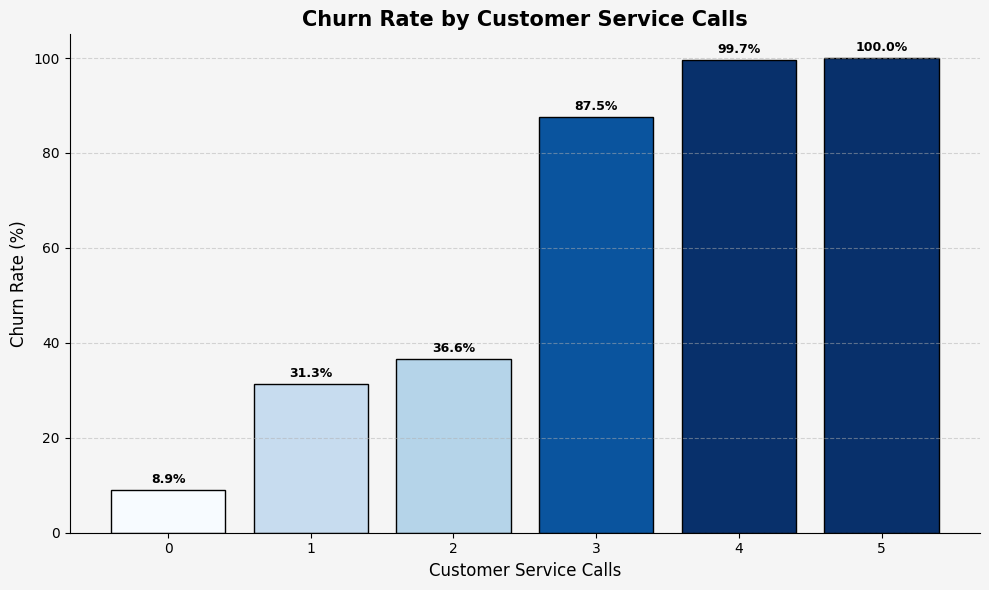

In [19]:
# Group data by 'Customer Service Calls' and calculate the churn rate
churn_by_calls = df.groupby('Customer Service Calls')['Churn Label'].mean() * 100

# Normalize churn rate
norm = plt.Normalize(churn_by_calls.min(), churn_by_calls.max())
colors = plt.cm.Blues(norm(churn_by_calls.values))  # Dùng thang màu xanh

# create chart
fig, ax = plt.subplots(figsize=(10, 6))

# Đặt màu nền xám nhẹ
fig.patch.set_facecolor('#f5f5f5')
ax.set_facecolor('#f5f5f5')

# Vẽ bar chart với màu sắc đã chuẩn hóa
bars = ax.bar(
    x=churn_by_calls.index,
    height=churn_by_calls.values,
    color=colors,
    edgecolor='black'  # Thêm viền đen nhẹ cho các cột
)

# Thêm nhãn phần trăm lên trên từng cột
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Khoảng cách giữa nhãn và đầu cột
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9, fontweight='bold')

# Trang trí thêm
ax.set_xlabel('Customer Service Calls', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate by Customer Service Calls', fontsize=15, fontweight='bold')
ax.tick_params(axis='both', labelsize=10)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show
plt.show()

- Tỷ lệ churn ở những khách hàng có nhiều cuộc gọi tới chăm sóc khách hàng. Điều này thể hiện khách hàng gặp vấn đề tuy nhiên dịch vụ chăm sóc khách hàng không giải quyết được vấn đề dẫn tới việc khách hàng khi không giải quyết được vấn đề họ sẽ rời đi do cảm thấy dịch vụ họ đăng kí không tốt
- correlation call vaf monthly use

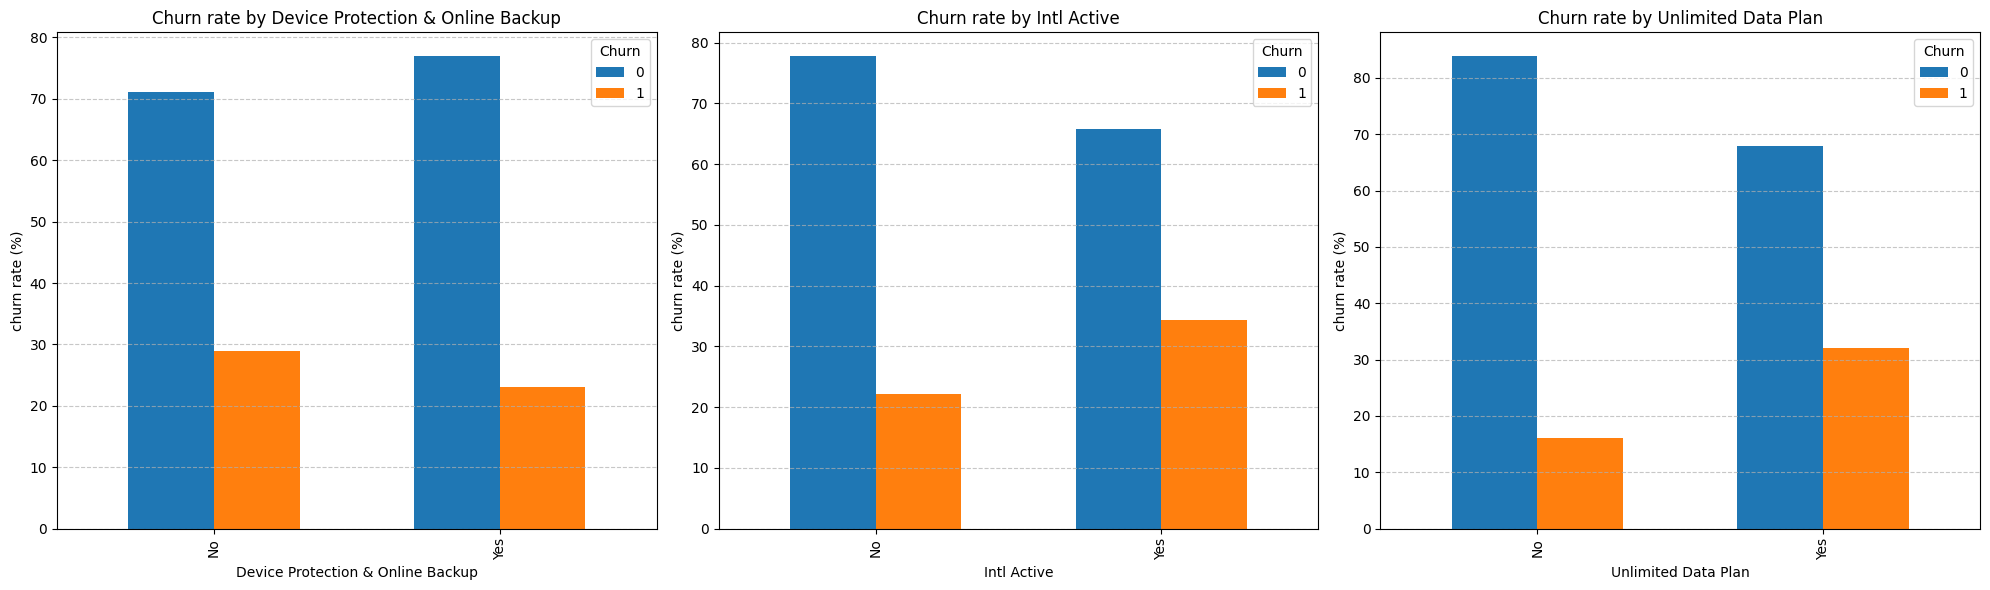

In [20]:
services = ['Device Protection & Online Backup', 'Intl Active', 'Unlimited Data Plan']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

for i, service in enumerate(services):
    crosstab = pd.crosstab(df[service], df['Churn Label'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'], width=0.6)
    axes[i].set_title(f'Churn rate by {service}')
    axes[i].set_ylabel('churn rate (%)')
    axes[i].set_xlabel(service)
    axes[i].legend(title='Churn')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Device protection & Online backup
- tỷ lệ churn của nhóm khách hàng có dùng dịch thấp hơn nhóm không dùng dịch vụ
=> điều này thể hiện việc dịch vụ bảo vệ thiêt bị và sao lưu thông tin dự phòng giúp khách hàng cảm thấy tiện lợi và an tâm khi dùng dịch vụ từ đó giữ chân khác hàng
# Intl Active
- NHóm khách hàng sử dụng dịch vụ có tỷ lệ churn lên tới 35% cao hơn 23% so với nhóm khách hàng không sử dụng dịch vụ.
=> Dịch vụ gọi điện quốc tế đang cho thấy không đem lại được sự hài lòng cho khác hàng có thể do giá cước phải tra cao khiến khách hàng cảm thấy vân phân so với các đối thủ cạnh tranh
# Unlimited data plan
- Nhóm khách hàng sử dụng dịch vụ có tỷ lệ churn 33% so với nhóm không sử dụng dịch vụ 17%
=> Chất lượng không giới hạn data có thể nằm ở tốc độ và chất lượng không nhưu kì vọng và giá dịch vụ cao hơn so với đối thủ cạnh tranh cũng là yếu tố khiến khách hàng rời đi

# Giải pháp
- Đào tạo nâng cao chất lượng nghiệp vụ chắm sóc khác hàng của nhân viên đảm nhận bọ phận CS
- Sử dụng hệ thống tự động thông báo nhằm gửi thông tin khuyến mãi nhanh nhất tới khách hàng
- Đẩy mạnh chiến dịch market ting về dịch vụ protect device để gia tăng sự an tâm của khác hàng
- điều chỉnh giá cước dịch vụ và các gọi data cho từng đối tượng nhằm hướng tới mỗi đa dạng hóa gói mạng viễn thông cho đa lứa tuổi và mục đích sử dụng